https://towardsdatascience.com/visualization-in-python-finding-routes-between-points-2d97d4881996

In [1]:
import osmnx as ox
import networkx as nx
import geohash as geohash
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
ox.settings.log_console=True
ox.settings.use_cache=True

In [3]:
# define the start and end locations in latlng
start_latlng = (37.78497,-122.43327)
end_latlng = (37.78071,-122.41445)


In [4]:
# location where you want to find your route
place     = 'San Francisco, California, United States'

In [5]:
# find shortest route based on the mode of travel
mode      = 'drive'        # 'drive', 'bike', 'walk'

In [6]:
# find shortest path based on distance or time
optimizer = 'time'        # 'length','time'

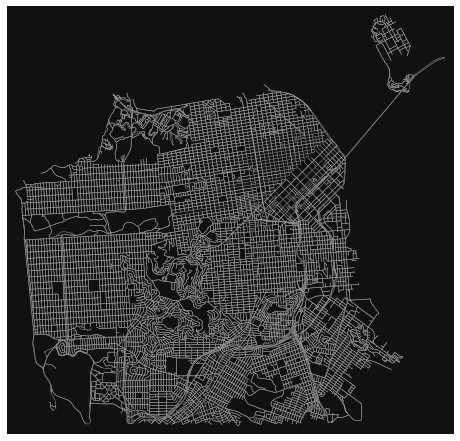

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [44]:
# create graph from OSM within the boundaries of some 
# geocodable place(s)
graph = ox.graph_from_place(place, network_type = mode)
ox.plot_graph(graph,node_size=0, edge_linewidth=0.5)

In [45]:
# find the nearest node to the start location
orig_node = ox.distance.nearest_nodes(graph, start_latlng[1],
                                      start_latlng[0])
orig_node

65314192

In [46]:
# find the nearest node to the end location
dest_node = ox.distance.nearest_nodes(graph, end_latlng[1],
                                      end_latlng[0])
dest_node

65373970

In [47]:
#  find the shortest path
shortest_route = nx.shortest_path(graph,
                                  orig_node,
                                  dest_node,
                                  weight=optimizer)

In [48]:
shortest_route

[65314192,
 258759765,
 65314189,
 65314187,
 65314183,
 65287128,
 267456161,
 65287111,
 65317959,
 9691602646,
 258758550,
 65317957,
 65327154,
 65327151,
 65327150,
 65308283,
 65308278,
 65308272,
 65308270,
 65373970]

In [49]:
shortest_route_map = ox.plot_route_folium(graph, shortest_route)
shortest_route_map

In [13]:
shortest_route_map = ox.plot_route_folium(graph, shortest_route, 
                                          tiles='openstreetmap')
shortest_route_map

In [14]:
import folium
folium.TileLayer('openstreetmap').add_to(shortest_route_map)
folium.TileLayer('Stamen Terrain').add_to(shortest_route_map)
folium.TileLayer('Stamen Toner').add_to(shortest_route_map)
folium.TileLayer('Stamen Water Color').add_to(shortest_route_map)
folium.TileLayer('cartodbpositron').add_to(shortest_route_map)
folium.TileLayer('cartodbdark_matter').add_to(shortest_route_map)
folium.LayerControl().add_to(shortest_route_map)
shortest_route_map

Start the original Coding

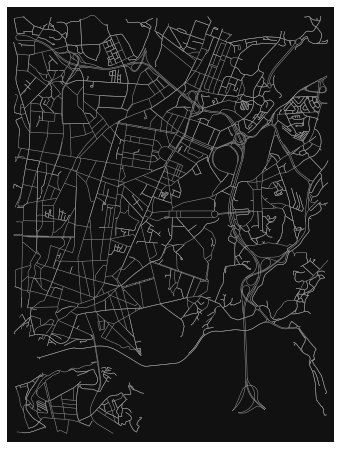

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [111]:
# create graph from OSM within the boundaries of some 
# geocodable place(s)
# {'s': 41.1328125, 'w': -8.61328125, 'n': 41.1767578125, 'e': -8.5693359375}
# bbox=
# cf = '["highway"~"motorway|trunk|primary|secondary|tertiary"]'
# cf = '["highway|motorway"~trunk|primary|secondary|tertiary"]'

# porto_graph = ox.graph_from_place('Porto, Portugal', network_type = 'all')
# porto_graph=ox.graph_from_bbox(41.1767578125,41.1328125,-8.5693359375,-8.61328125,network_type = 'drive',custom_filter=cf)
porto_graph=ox.graph_from_bbox(41.1767578125,41.1328125,-8.5693359375,-8.61328125,network_type = 'drive')

# G_projected = ox.project_graph(porto_graph)
ox.plot_graph(porto_graph,node_size=0, edge_linewidth=0.5)

In [16]:
train_df = pd.read_csv('train.csv')
train_df=train_df.sample(n=500000,replace=True, random_state=1)
dup_train_df = train_df[train_df['TRIP_ID'].duplicated()]
dup_train_df.reset_index()
lst_duplicated_trip_id = list(dup_train_df['TRIP_ID']) 
cleaned_train_df = train_df[~train_df['TRIP_ID'].isin(lst_duplicated_trip_id)]

In [17]:
box=geohash.bbox("ez3fh")
box

{'s': 41.1328125, 'w': -8.61328125, 'n': 41.1767578125, 'e': -8.5693359375}

In [1]:
route_map = ox.plot_route_folium(porto_graph, route)


NameError: name 'ox' is not defined

In [122]:
# Gs = ox.utils_graph.get_largest_component(porto_graph, strongly=True)
from IPython.display import IFrame

In [135]:
count=0
limit=0
lat_or=[]
long_or=[]
ylimit_low=box['s']
xlimit_low=box['w']
ylimit_high=box['n']
xlimit_high=box['e']
print(box)
for data in range(cleaned_train_df.shape[0]):
                    
    trajectories=[]
    count=count+1
    coord = cleaned_train_df.eval(cleaned_train_df[['POLYLINE']].values[data])[0]
    if(len(coord)<1):
        print(len(coord))
    else:
        
        xs, ys = zip(*coord)
        if((max(xs)<=xlimit_high) and (min(xs)>= xlimit_low) and (max(ys)<= ylimit_high) and (min(ys)>= ylimit_low) ):
            if(len(xs)>40):
                limit=limit+1
                print(limit)
                if(limit>10):
                    print("Raw no: "+str(count))
                    break
                nodes_in_map=list(porto_graph.nodes())
                all_routes=[]
                for i in range(len(xs)-1):
                    org = ox.nearest_nodes(porto_graph,xs[i],ys[i])
                    dest = ox.nearest_nodes(porto_graph,xs[i+1],ys[i+1])
                    shortest_route = nx.shortest_path(porto_graph,org,dest,weight='length')
                    if(len(shortest_route)>1):
                        all_routes.append(shortest_route)
                for i in range(len(all_routes)):
                    if i==0:
                        shortest_route_map = ox.plot_route_folium(porto_graph, all_routes[i],zoom_start=10)
                        
                    else:
                        shortest_route_map = ox.plot_route_folium(porto_graph,all_routes[i],route_map=shortest_route_map,popup_attribute="length",zoom_start=10)
                        
                filepath = "html/"+str(limit)+"_route_graph.html"
                shortest_route_map.save(filepath)
#                 IFrame(filepath, width=600, height=500)
                                         
shortest_route_map

{'s': 41.1328125, 'w': -8.61328125, 'n': 41.1767578125, 'e': -8.5693359375}
1
2
3
4
5
6
7
8
9
10
11
Raw no: 366


{'s': 41.1328125, 'w': -8.61328125, 'n': 41.1767578125, 'e': -8.5693359375}
1


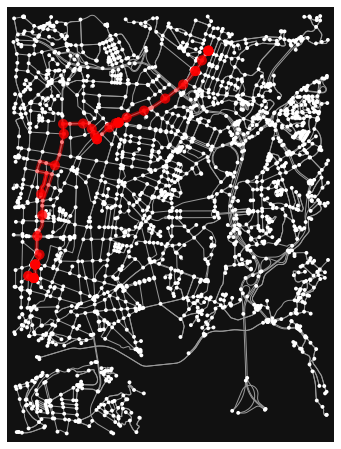

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)
2
Raw no: 30


(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)